## Installation

1. Type `python3` into Terminal. If you see a few lines of text followed by `>>>`, then Python3 is already installed. Type Ctrl+d (or close the window) to exit and skip to step 3.
2. Go to https://www.python.org/downloads/ and click on "Download Python 3.6.4". Run the installer and follow the directions. Repeat step 1 to make sure it has successfully installed.
3. Install jupyter notebook, so that you can use this tutorial, by typing the following into Terminal:
    `pip3 install jupyter`
4. Start the jupyter notebook by typing in Terminal _in the same folder that you have this file_ 
    `jupyter notebook`
    This should open a tab in your web browser with a list of files in the folder. Click on this ipynb file to open it.
3. Install the tensorflow machine learning library by typing the following into Terminal:
    `pip3 install --upgrade tensorflow`
4. Install the keras machine learning library by typing the following into Terminal:
    `pip3 install keras`
5. Install the libraries we'll need to display the images: `pip3 install numpy matplotlib`
6. Test that the keras install worked: Again, type `python3` into the Terminal. When the `>>>` prompt comes up, type `from keras.models import Sequential`. If you don't get any error output, then it worked. Type Ctrl+d (or close the window) to exit.
    * If you get an error like `ModuleNotFoundError: No module named 'theano'` then you need to switch the backend to tensorflow. See the instructions at https://keras.io/backend/ or ask me for help.
    * If you get a warning like `/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6` you can ignore it. This is a known (trivial) issue with Tensorflow 1.4 for OSX. See https://github.com/tensorflow/tensorflow/issues/14182 if you'd like more details.


## The Code

First, we'll want to import the keras modules we'll be using for our neural network and the numpy and matplotlib modules that we'll be using for displaying our test images.

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D
import numpy
from matplotlib.pyplot import imshow
# tell matplotlib to display images within this notebook
%matplotlib inline 

## The First Model

Next, let's set up the structure of our model. We'll start with a really simple model, with just one convolutional layer that has just one filter. We are going to be using 9x9-pixel grayscale images, so we set the input shape accordingly. If we were using color images with red-green-blue channels, the last dimension would be size three (one for each color) instead of one.

In [17]:
kernel_size = 3
image_size = 9

In [18]:
model0 = Sequential()
model0.add(Conv2D(filters=1, kernel_size=kernel_size, input_shape=(image_size, image_size, 1)))

Normally at this point, we would compile and train (aka fit) our model, but instead we're going to set the weights manually and then see the output we get on some test images.

First, let's take a look at what the randomly generated weights look like, to understand the format that we'll need to use to set the new weights. By changing the parameters of the model above and looking at how it affects the weight structure, we can understand what each weight is connected to (try it!).

In [19]:
weights = model0.get_weights()
weights

[array([[[[ 0.18848842]],
 
         [[ 0.4050482 ]],
 
         [[ 0.57444847]]],
 
 
        [[[ 0.57087195]],
 
         [[ 0.08089572]],
 
         [[ 0.13089389]]],
 
 
        [[[-0.04188722]],
 
         [[ 0.26824814]],
 
         [[ 0.2349227 ]]]], dtype=float32), array([0.], dtype=float32)]

Now, we change the weights so that the filter will capture a certain pattern. We'll explore more about what this means below, but feel free to start generating some guesses.

In [20]:
layer_num = 0
filter_num = 0
y = 0
for x in range(kernel_size):
    weights[layer_num][y][x][0][filter_num] = 1
for y in range(1,kernel_size):
    for x in range(kernel_size):
        weights[layer_num][y][x][0][filter_num] = -1
weights

[array([[[[ 1.]],
 
         [[ 1.]],
 
         [[ 1.]]],
 
 
        [[[-1.]],
 
         [[-1.]],
 
         [[-1.]]],
 
 
        [[[-1.]],
 
         [[-1.]],
 
         [[-1.]]]], dtype=float32), array([0.], dtype=float32)]

And save those weights back into the model.

In [21]:
model0.set_weights(weights)

## Create Images

Now, let's create some 9x9 images that we will run through our model.

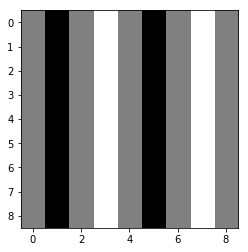

In [22]:
image0 = numpy.array([
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
], dtype=numpy.uint8)
imshow(image0, cmap='gray')

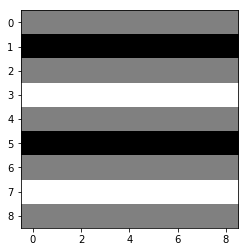

In [23]:
image1 = numpy.array([
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
], dtype=numpy.uint8)
imshow(image1, cmap='gray')

## Run Images Through Model

The images need to be in a slightly different format for Keras than they do for the imshow command. Right now, they are 9x9 arrays, and we need them to be 9x9x1 -- three dimensional instead of two.

In [24]:
images = []
for image in [image1]: # You may find it easier to take one of these out, to look at them one at a time
    images.append(numpy.resize(image, (image_size, image_size, 1)))

And now we give these images to our model and take a look at what the filter has found. 

In [25]:
model0.predict(numpy.array(images))

array([[[[    0.],
         [    0.],
         [    0.],
         [    0.],
         [    0.],
         [    0.],
         [    0.]],

        [[-1149.],
         [-1149.],
         [-1149.],
         [-1149.],
         [-1149.],
         [-1149.],
         [-1149.]],

        [[ -765.],
         [ -765.],
         [ -765.],
         [ -765.],
         [ -765.],
         [ -765.],
         [ -765.]],

        [[  381.],
         [  381.],
         [  381.],
         [  381.],
         [  381.],
         [  381.],
         [  381.]],

        [[    0.],
         [    0.],
         [    0.],
         [    0.],
         [    0.],
         [    0.],
         [    0.]],

        [[-1149.],
         [-1149.],
         [-1149.],
         [-1149.],
         [-1149.],
         [-1149.],
         [-1149.]],

        [[ -765.],
         [ -765.],
         [ -765.],
         [ -765.],
         [ -765.],
         [ -765.],
         [ -765.]]]], dtype=float32)

### Question 1
There are a lot of numbers in the output above. Where is each one coming from? Why are they in groups of seven?
* They are in groups of seven, because the kernel size is three and the stride is one. Therefore, the seventh column and seventh row are the last kernels that the network will register. Within the 7-by-7 arrays, each input value is the sum of the 3 x 3 kernel of the original image, multiplied by the weight value of each correlated value place.


### Question 2
In which image is the filter "finding" something, and why does this make sense, given the pattern of weights that was set? 
* It's finding something in image1, and this makes sense because the pattern in image1 closely resembles the pattern of the weights. Therefore, there will be more wildly negative and positive values, while in image0 the predicted values are generally in the same range, and thus nothing unexpected happens.

## The Second Model

Let's move to a slightly more complex model. Now, there are two convolutional layers, the first with two filters and the second with one filter. One other difference is that we're going to be taking strides so that we only examine each pixel once, instead of looking at overlapping groups. This makes it a little simpler to set the manual weights correctly for the pattern I chose.

In [26]:
model1 = Sequential()
model1.add(Conv2D(filters=2, kernel_size=kernel_size, input_shape=(image_size, image_size, 1), strides=(3,3)))
model1.add(Conv2D(filters=1, kernel_size=kernel_size, input_shape=(image_size, image_size, 1)))

With a different model structure, we will have a different number of weights to fit.

In [27]:
weights = model1.get_weights()
weights

[array([[[[-0.27489376,  0.43111977]],
 
         [[-0.20665005,  0.20280477]],
 
         [[-0.1178771 , -0.25331998]]],
 
 
        [[[-0.31973857,  0.33896038]],
 
         [[-0.30981034, -0.05047765]],
 
         [[-0.0986779 , -0.42419815]]],
 
 
        [[[-0.04540148,  0.20128873]],
 
         [[ 0.17319307,  0.2051796 ]],
 
         [[-0.24310999,  0.04386511]]]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[[[ 0.43681207],
          [-0.21444574]],
 
         [[-0.01462889],
          [-0.40871012]],
 
         [[-0.27912644],
          [ 0.32258275]]],
 
 
        [[[-0.45463032],
          [-0.444062  ]],
 
         [[ 0.06298998],
          [ 0.4692392 ]],
 
         [[ 0.14643851],
          [ 0.14844325]]],
 
 
        [[[ 0.29765686],
          [ 0.36691663]],
 
         [[ 0.3059323 ],
          [ 0.45019856]],
 
         [[ 0.13227984],
          [ 0.46962133]]]], dtype=float32),
 array([0.], dtype=float32)]

As before, we manually set the weights to match some specific patterns.

In [28]:
layer_num = 0
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        if y == x:
            weights[layer_num][y][x][0][filter_num] = 1
        else:
            weights[layer_num][y][x][0][filter_num] = -1

filter_num = 1
for y in range(kernel_size):
    for x in range(kernel_size):
        if kernel_size - 1 - y == x:
            weights[layer_num][y][x][0][filter_num] = 1
        else:
            weights[layer_num][y][x][0][filter_num] = -1

In [29]:
layer_num = 2
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        input_filter_num = 0
        if y == x:
            weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = -0.25
        input_filter_num = 1
        if kernel_size - 1 - y == x:
            weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = -0.25
weights

[array([[[[ 1., -1.]],
 
         [[-1., -1.]],
 
         [[-1.,  1.]]],
 
 
        [[[-1., -1.]],
 
         [[ 1.,  1.]],
 
         [[-1., -1.]]],
 
 
        [[[-1.,  1.]],
 
         [[-1., -1.]],
 
         [[ 1., -1.]]]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[[[ 1.  ],
          [-0.25]],
 
         [[-0.25],
          [-0.25]],
 
         [[-0.25],
          [ 1.  ]]],
 
 
        [[[-0.25],
          [-0.25]],
 
         [[ 1.  ],
          [ 1.  ]],
 
         [[-0.25],
          [-0.25]]],
 
 
        [[[-0.25],
          [ 1.  ]],
 
         [[-0.25],
          [-0.25]],
 
         [[ 1.  ],
          [-0.25]]]], dtype=float32),
 array([0.], dtype=float32)]

And save the weights back into the model.

In [30]:
model1.set_weights(weights)

Again, run our test images through the model to see what the filters output.

In [31]:
def predict_images(images):
    resized_images = []
    for image in images:
        resized_images.append(numpy.resize(image, (image_size, image_size, 1)))
    return model1.predict(numpy.array(resized_images))

In [32]:
predict_images([image0, image1])

array([[[[-1150.]]],


       [[[-1150.]]]], dtype=float32)

## Exercise 1

Note above that neither image0 nor image1 gets a positive output. Create some images that do get positive ouputs from this model. The code below might help you get started.

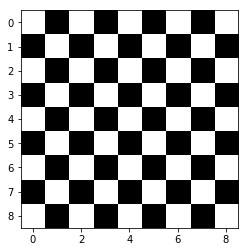

In [73]:
image_black = numpy.array([
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
], dtype=numpy.uint8)
imshow(image_black, cmap='gray', vmin=0, vmax=255)

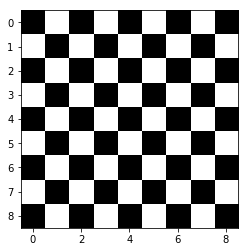

In [76]:
image_white = numpy.array([
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
], dtype=numpy.uint8)
imshow(image_white, cmap='gray', vmin=0, vmax=255)

In [77]:
predict_images([image_black, image_white])

array([[[[ 3315.]]],


       [[[-5610.]]]], dtype=float32)

## Exercise 2 (Optional)

Add additional filters to the model, and create images that get positive weights for different patterns of filters.